        Date Business Line            Event Type  \
0 2015-01-01    Technology        System Failure   
1 2015-01-02     Insurance     Operational Error   
2 2015-01-03        Retail                 Fraud   
3 2015-01-04   Real Estate      Natural Disaster   
4 2015-01-05    Healthcare  Compliance Violation   

                                   Event Description  Event Net Loss Amount  
0         Market Risk occurred in Technology sector.               70685.38  
1                   Fraud occurred in Retail sector.               63693.32  
2  Supply Chain Disruption occurred in Transporta...               57501.33  
3  Supply Chain Disruption occurred in Retail sec...               41051.57  
4      Equipment Failure occurred in Finance sector.               55209.72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----    

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1253206838.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')


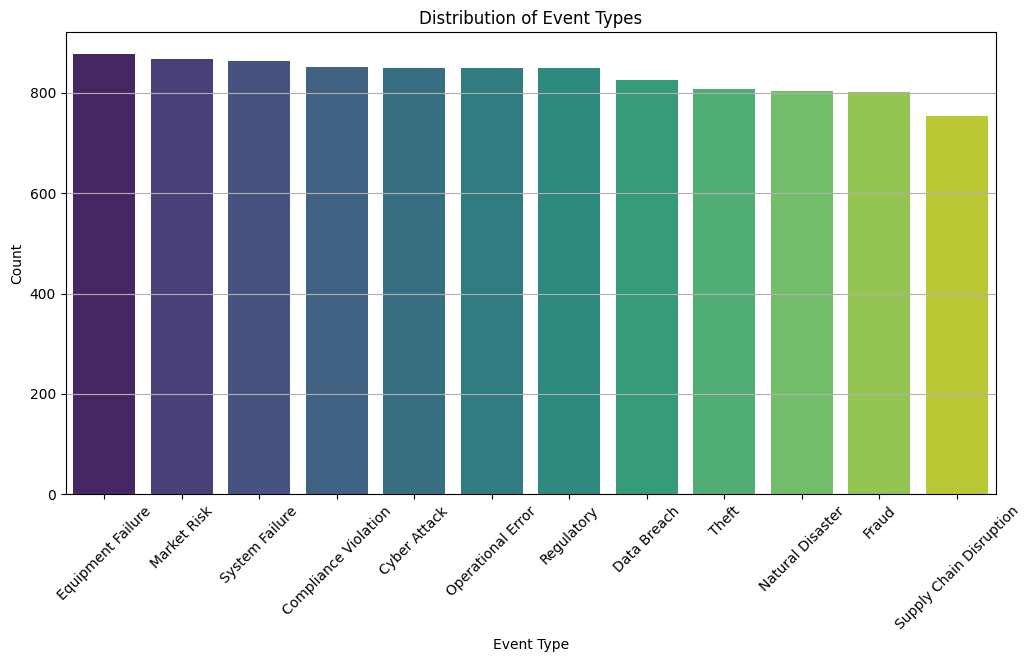

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1253206838.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')


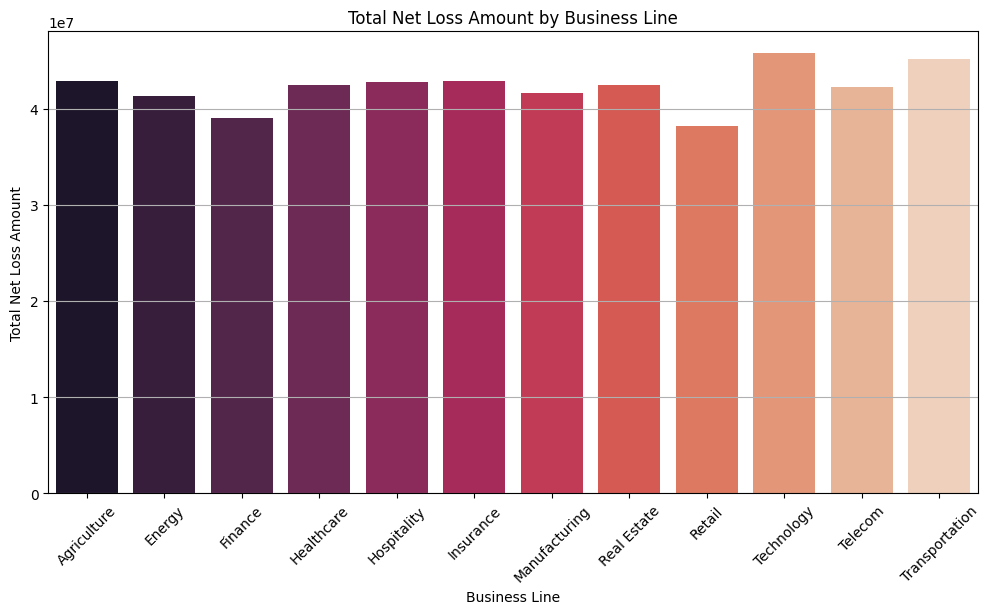

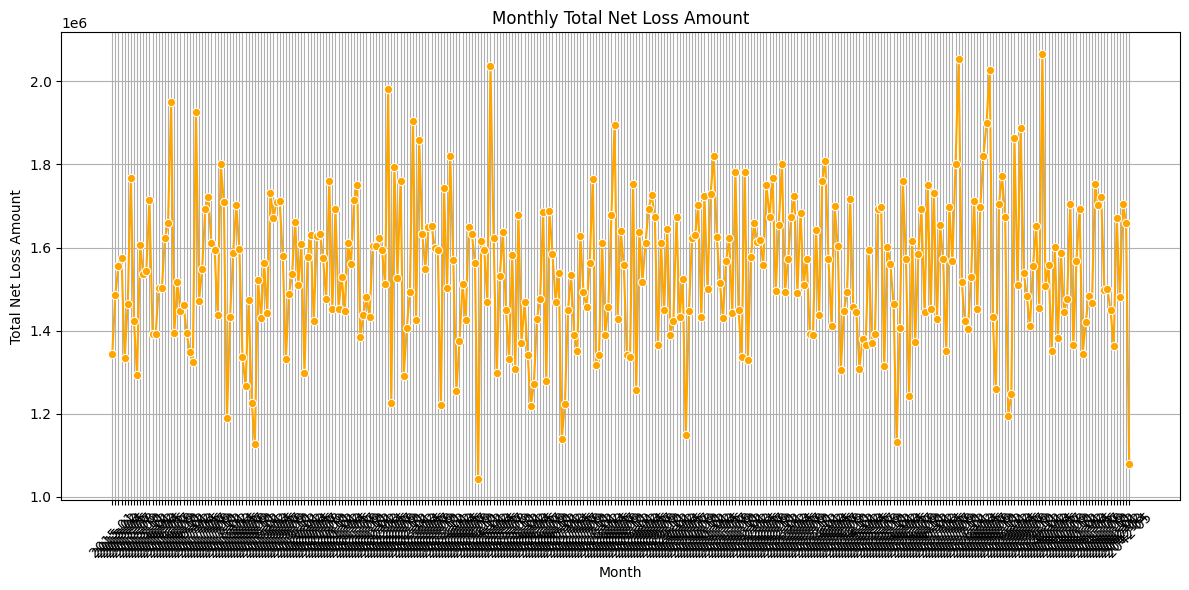

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1253206838.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')


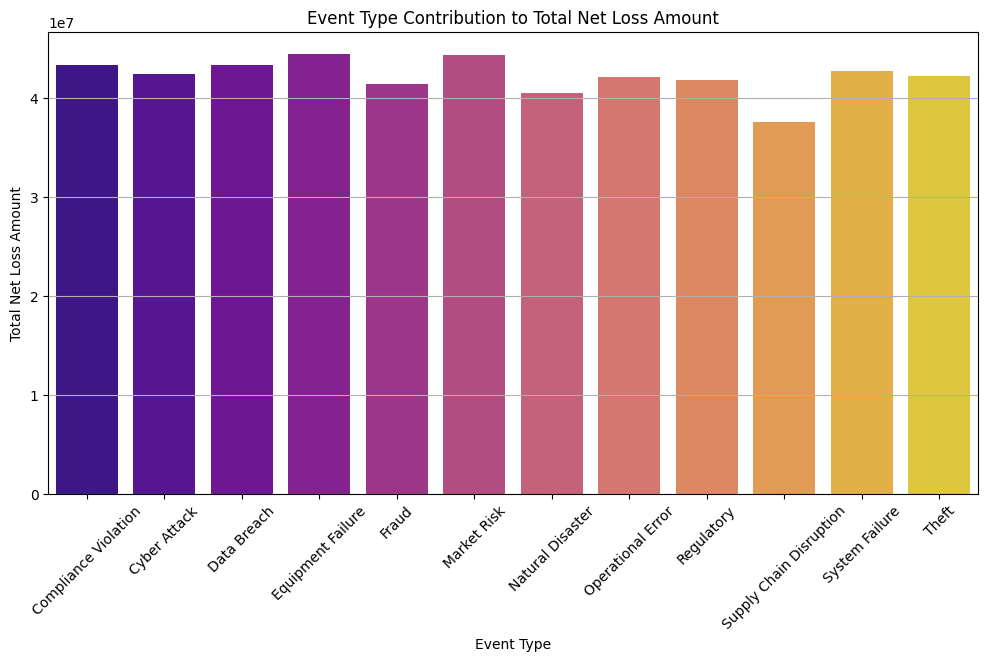

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Constants
num_records = 10000

# Updated business lines and event types
business_lines = [
    'Retail', 'Insurance', 'Telecom', 'Finance', 'Healthcare',
    'Manufacturing', 'Energy', 'Transportation', 'Hospitality',
    'Agriculture', 'Technology', 'Real Estate'
]

event_types = [
    'Fraud', 'System Failure', 'Regulatory', 'Data Breach',
    'Natural Disaster', 'Operational Error', 'Market Risk', 
    'Cyber Attack', 'Supply Chain Disruption', 'Theft', 
    'Compliance Violation', 'Equipment Failure'
]

# Generate dummy data
data = {
    'Date': pd.date_range(start='2015-01-01', periods=num_records, freq='D'),
    'Business Line': [random.choice(business_lines) for _ in range(num_records)],
    'Event Type': [random.choice(event_types) for _ in range(num_records)],
    'Event Description': [f"{event_type} occurred in {random.choice(business_lines)} sector." for event_type in random.choices(event_types, k=num_records)],
    'Event Net Loss Amount': [round(random.uniform(1000, 100000), 2) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('operational_loss_data.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())

# Load the data
df = pd.read_csv('operational_loss_data.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# EDA

# 1. Overview of the dataset
print(df.info())

# 2. Summary statistics
print(df.describe())

# 3. Distribution of Event Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Event Types')
plt.xticks(rotation=45)
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 4. Total Net Loss Amount by Business Line
loss_by_business_line = df.groupby('Business Line')['Event Net Loss Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')
plt.title('Total Net Loss Amount by Business Line')
plt.xticks(rotation=45)
plt.xlabel('Business Line')
plt.ylabel('Total Net Loss Amount')
plt.grid(axis='y')
plt.show()

# 5. Monthly Total Net Loss Amount
df['Month'] = df['Date'].dt.to_period('M')
monthly_loss = df.groupby('Month')['Event Net Loss Amount'].sum().reset_index()

# Convert 'Month' to a string for better plotting
monthly_loss['Month'] = monthly_loss['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_loss, x='Month', y='Event Net Loss Amount', marker='o', color='orange')
plt.title('Monthly Total Net Loss Amount')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Net Loss Amount')
plt.grid()
plt.tight_layout()  # Ensures everything fits well in the figure
plt.show()

# 6. Event Type Contribution to Net Loss Amount
event_loss_contribution = df.groupby('Event Type')['Event Net Loss Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')
plt.title('Event Type Contribution to Total Net Loss Amount')
plt.xticks(rotation=45)
plt.xlabel('Event Type')
plt.ylabel('Total Net Loss Amount')
plt.grid(axis='y')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10000 non-null  datetime64[ns]
 1   Business Line          10000 non-null  object        
 2   Event Type             10000 non-null  object        
 3   Event Description      10000 non-null  object        
 4   Event Net Loss Amount  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB
None
                      Date  Event Net Loss Amount
count                10000           10000.000000
mean   2028-09-08 12:00:00           50390.855065
min    2015-01-01 00:00:00            1025.610000
25%    2021-11-04 18:00:00           25795.337500
50%    2028-09-08 12:00:00           50112.590000
75%    2035-07-14 06:00:00           74952.655000
max    2042-05-18 00:00:00           99998.900000
st

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1831307756.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')


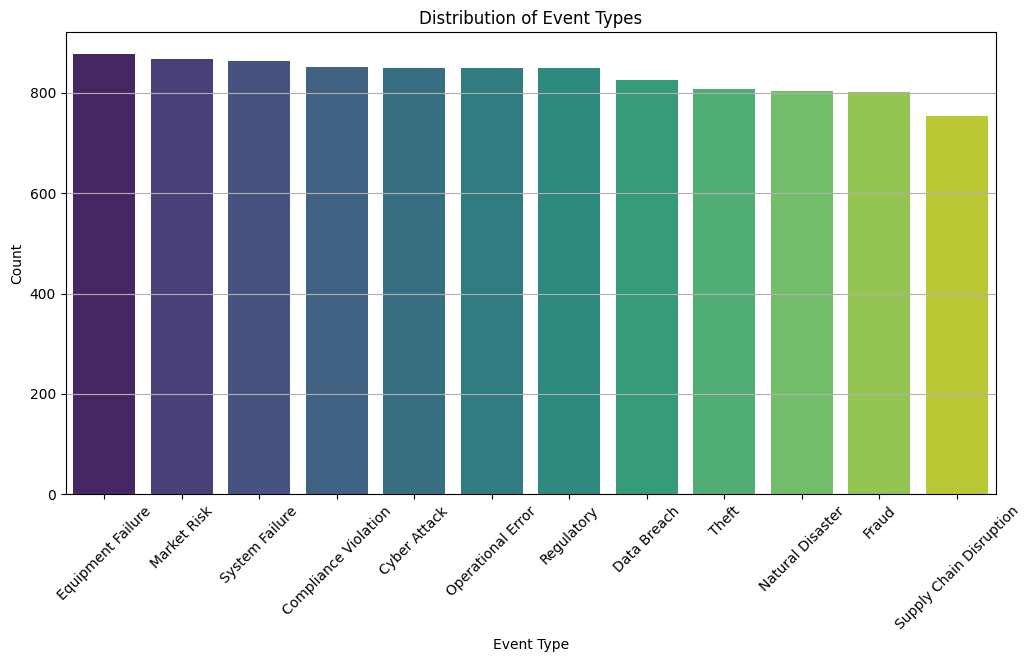

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1831307756.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')


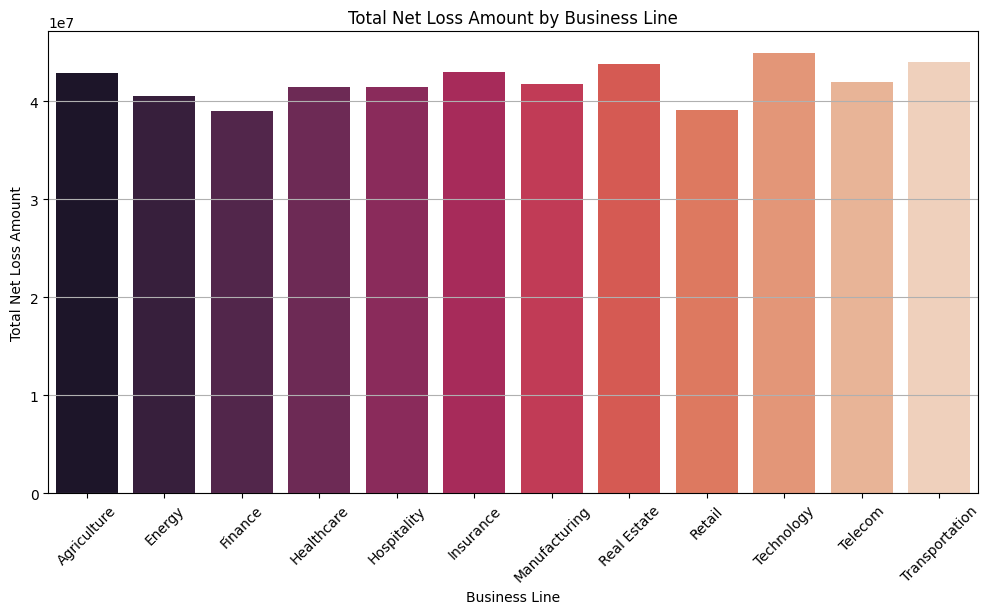

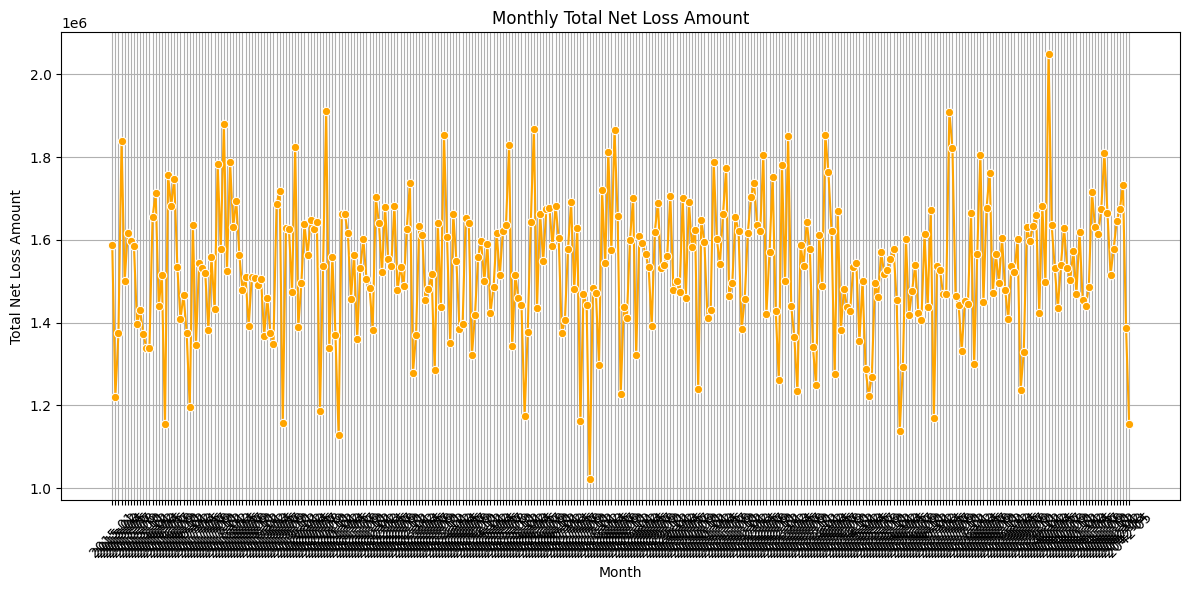

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1831307756.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')


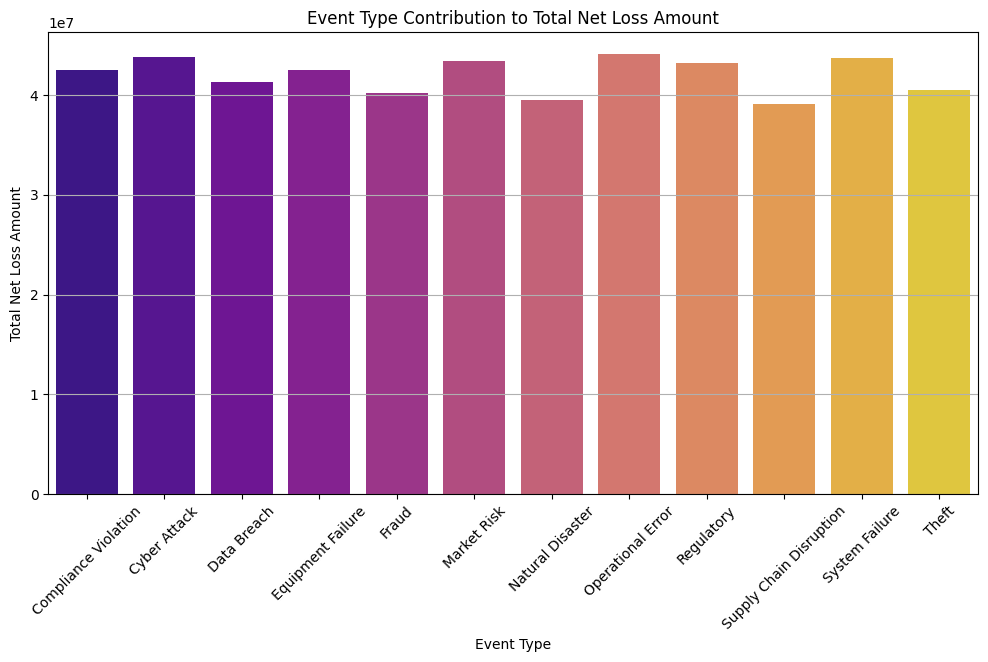


Value at Risk (VaR) at 95% confidence level by Business Line:
     Business Line      VaR
0      Agriculture  6359.96
1           Energy  5633.98
2          Finance  4422.37
3       Healthcare  7123.03
4      Hospitality  6122.27
5        Insurance  6317.15
6    Manufacturing  5401.64
7      Real Estate  5503.21
8           Retail  8186.55
9       Technology  5545.11
10         Telecom  6592.15
11  Transportation  5560.18

Value at Risk (VaR) at 99% confidence level by Business Line:
     Business Line      VaR
0      Agriculture  2185.26
1           Energy  2199.59
2          Finance  1550.45
3       Healthcare  2362.30
4      Hospitality  1664.63
5        Insurance  2285.62
6    Manufacturing  1820.31
7      Real Estate  1564.61
8           Retail  2836.27
9       Technology  1782.31
10         Telecom  1770.07
11  Transportation  1692.31

Value at Risk (VaR) at 95% confidence level by Event Type:
                 Event Type      VaR
0      Compliance Violation  5148.26
1           

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1831307756.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(group_by_column).apply(lambda x: calculate_var(x, confidence_level)).reset_index()
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\1831307756.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(group_by_column).apply(lambda

In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Constants
NUM_RECORDS = 10000

# Updated business lines and event types
BUSINESS_LINES = [
    'Retail', 'Insurance', 'Telecom', 'Finance', 'Healthcare',
    'Manufacturing', 'Energy', 'Transportation', 'Hospitality',
    'Agriculture', 'Technology', 'Real Estate'
]

EVENT_TYPES = [
    'Fraud', 'System Failure', 'Regulatory', 'Data Breach',
    'Natural Disaster', 'Operational Error', 'Market Risk', 
    'Cyber Attack', 'Supply Chain Disruption', 'Theft', 
    'Compliance Violation', 'Equipment Failure'
]

def generate_dummy_data(num_records):
    """Generate a dummy dataset for operational loss events."""
    data = {
        'Date': pd.date_range(start='2015-01-01', periods=num_records, freq='D'),
        'Business Line': [random.choice(BUSINESS_LINES) for _ in range(num_records)],
        'Event Type': [random.choice(EVENT_TYPES) for _ in range(num_records)],
        'Event Description': [
            f"{random.choice(EVENT_TYPES)} occurred in {random.choice(BUSINESS_LINES)} sector."
            for _ in range(num_records)
        ],
        'Event Net Loss Amount': [round(random.uniform(1000, 100000), 2) for _ in range(num_records)]
    }
    return pd.DataFrame(data)

def save_data_to_csv(df, filename):
    """Save the DataFrame to a CSV file."""
    df.to_csv(filename, index=False)

def load_data_from_csv(filename):
    """Load data from a CSV file."""
    return pd.read_csv(filename)

def plot_event_type_distribution(df):
    """Plot the distribution of event types."""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')
    plt.title('Distribution of Event Types')
    plt.xticks(rotation=45)
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

def plot_loss_by_business_line(df):
    """Plot total net loss amount by business line."""
    loss_by_business_line = df.groupby('Business Line')['Event Net Loss Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')
    plt.title('Total Net Loss Amount by Business Line')
    plt.xticks(rotation=45)
    plt.xlabel('Business Line')
    plt.ylabel('Total Net Loss Amount')
    plt.grid(axis='y')
    plt.show()

def plot_monthly_net_loss(df):
    """Plot monthly total net loss amount."""
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_loss = df.groupby('Month')['Event Net Loss Amount'].sum().reset_index()

    # Convert 'Month' to a string for better plotting
    monthly_loss['Month'] = monthly_loss['Month'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_loss, x='Month', y='Event Net Loss Amount', marker='o', color='orange')
    plt.title('Monthly Total Net Loss Amount')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Total Net Loss Amount')
    plt.grid()
    plt.tight_layout()  # Ensures everything fits well in the figure
    plt.show()

def plot_event_type_contribution(df):
    """Plot event type contribution to total net loss amount."""
    event_loss_contribution = df.groupby('Event Type')['Event Net Loss Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')
    plt.title('Event Type Contribution to Total Net Loss Amount')
    plt.xticks(rotation=45)
    plt.xlabel('Event Type')
    plt.ylabel('Total Net Loss Amount')
    plt.grid(axis='y')
    plt.show()

def calculate_var(df, confidence_level=0.95):
    """Calculate the Value at Risk (VaR) at a specified confidence level."""
    sorted_losses = df['Event Net Loss Amount'].sort_values()
    var_index = int((1 - confidence_level) * len(sorted_losses))
    var_value = sorted_losses.iloc[var_index]
    return var_value

def calculate_var_per_group(df, group_by_column, confidence_level=0.95):
    """Calculate VaR for each group in the DataFrame."""
    var_results = df.groupby(group_by_column).apply(lambda x: calculate_var(x, confidence_level)).reset_index()
    var_results.columns = [group_by_column, 'VaR']
    return var_results

# Generate dummy data
df = generate_dummy_data(NUM_RECORDS)

# Save the DataFrame to a CSV file
save_data_to_csv(df, 'operational_loss_data.csv')

# Load the data
df = load_data_from_csv('operational_loss_data.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# EDA
# 1. Overview of the dataset
print(df.info())

# 2. Summary statistics
print(df.describe())

# 3. Distribution of Event Types
plot_event_type_distribution(df)

# 4. Total Net Loss Amount by Business Line
plot_loss_by_business_line(df)

# 5. Monthly Total Net Loss Amount
plot_monthly_net_loss(df)

# 6. Event Type Contribution to Net Loss Amount
plot_event_type_contribution(df)

# 7. Calculate VaR at 95% and 99% confidence levels for each Business Line
var_business_line_95 = calculate_var_per_group(df, 'Business Line', confidence_level=0.95)
print("\nValue at Risk (VaR) at 95% confidence level by Business Line:")
print(var_business_line_95)

var_business_line_99 = calculate_var_per_group(df, 'Business Line', confidence_level=0.99)
print("\nValue at Risk (VaR) at 99% confidence level by Business Line:")
print(var_business_line_99)

# 8. Calculate VaR for each Event Type at 95% and 99% confidence levels
var_event_type_95 = calculate_var_per_group(df, 'Event Type', confidence_level=0.95)
print("\nValue at Risk (VaR) at 95% confidence level by Event Type:")
print(var_event_type_95)

var_event_type_99 = calculate_var_per_group(df, 'Event Type', confidence_level=0.99)
print("\nValue at Risk (VaR) at 99% confidence level by Event Type:")
print(var_event_type_99)


Complete Code with VaR Calculation for Both Business Line and Event Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10000 non-null  datetime64[ns]
 1   Business Line          10000 non-null  object        
 2   Event Type             10000 non-null  object        
 3   Event Description      10000 non-null  object        
 4   Event Net Loss Amount  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB
None
                      Date  Event Net Loss Amount
count                10000           10000.000000
mean   2028-09-08 12:00:00           50390.855065
min    2015-01-01 00:00:00            1025.610000
25%    2021-11-04 18:00:00           25795.337500
50%    2028-09-08 12:00:00           50112.590000
75%    2035-07-14 06:00:00           74952.655000
max    2042-05-18 00:00:00           99998.900000
st

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\2789254980.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')


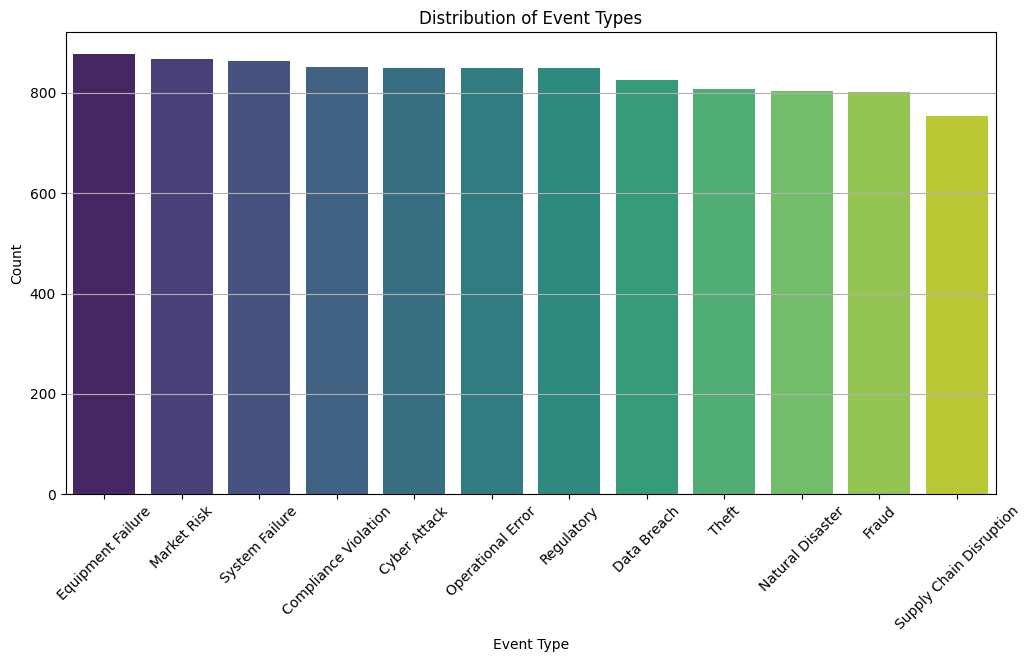

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\2789254980.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')


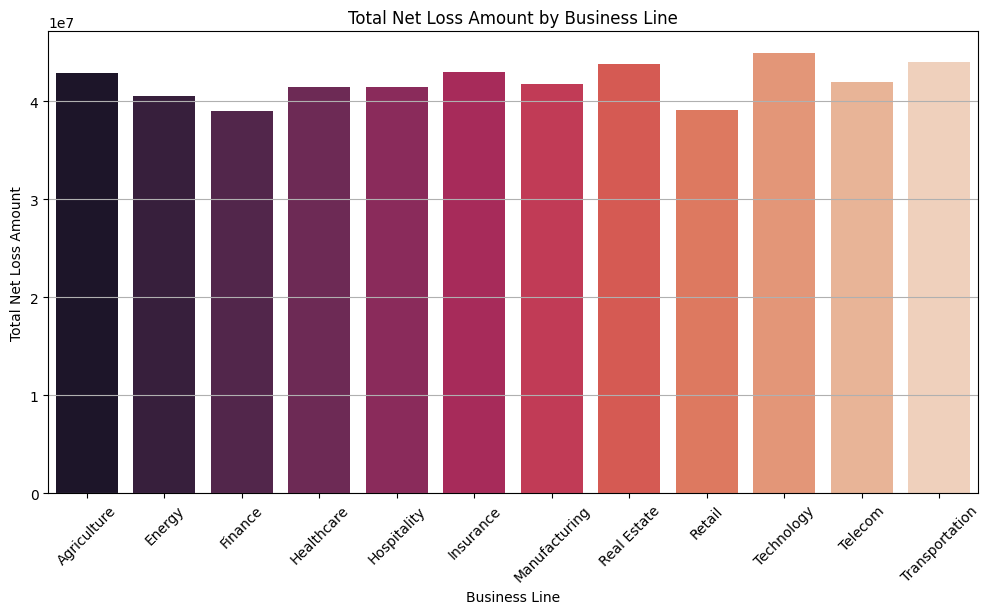

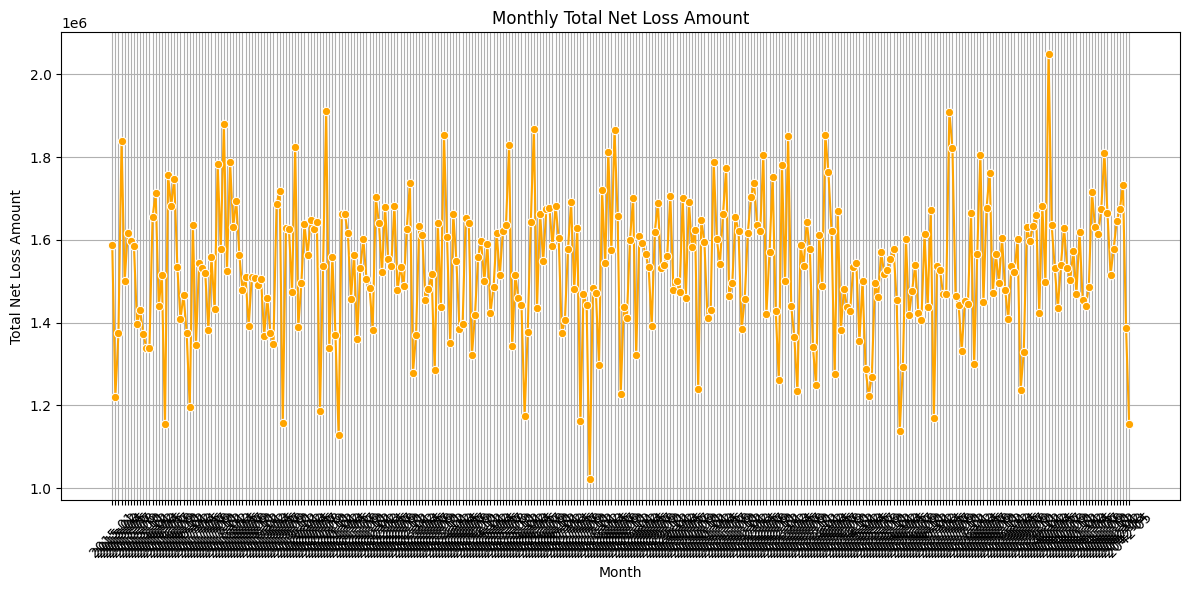

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\2789254980.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')


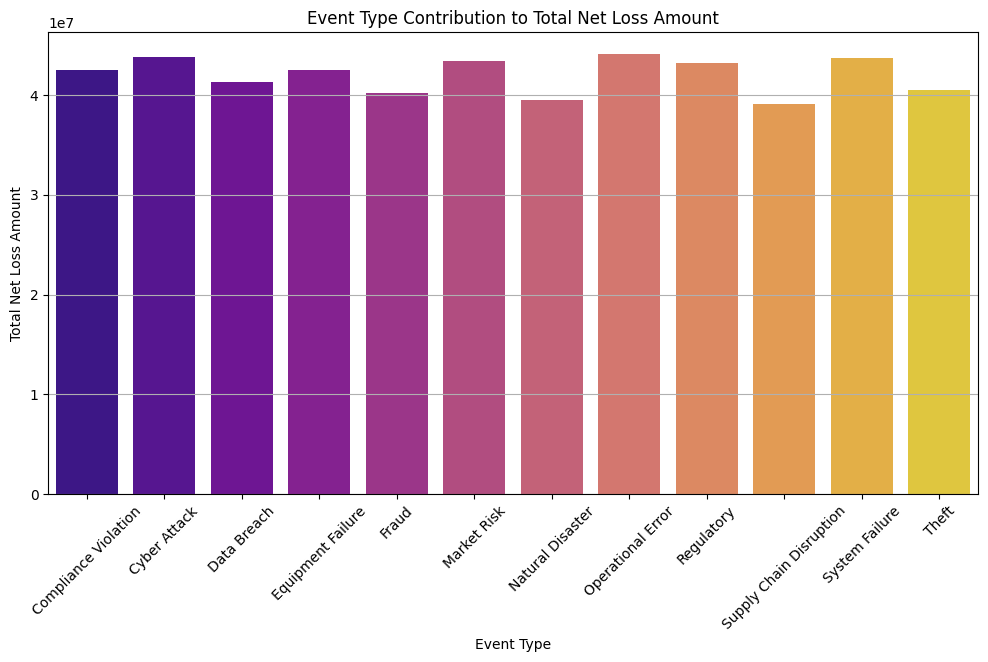


Value at Risk (VaR) at 95% confidence level by Business Line and Event Type:
      Business Line               Event Type       VaR
0       Agriculture     Compliance Violation   5714.43
1       Agriculture             Cyber Attack   9746.48
2       Agriculture              Data Breach   4964.96
3       Agriculture        Equipment Failure   6618.62
4       Agriculture                    Fraud  12629.72
..              ...                      ...       ...
139  Transportation        Operational Error   5198.11
140  Transportation               Regulatory   3876.52
141  Transportation  Supply Chain Disruption   4575.67
142  Transportation           System Failure   5560.18
143  Transportation                    Theft   3864.65

[144 rows x 3 columns]

Value at Risk (VaR) at 99% confidence level by Business Line and Event Type:
      Business Line               Event Type      VaR
0       Agriculture     Compliance Violation  1355.70
1       Agriculture             Cyber Attack  3752.4

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\2789254980.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(group_by_columns).apply(lambda x: calculate_var(x, confidence_level)).reset_index()
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\2789254980.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(group_by_columns).apply(lamb

In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Constants
NUM_RECORDS = 10000

# Updated business lines and event types
BUSINESS_LINES = [
    'Retail', 'Insurance', 'Telecom', 'Finance', 'Healthcare',
    'Manufacturing', 'Energy', 'Transportation', 'Hospitality',
    'Agriculture', 'Technology', 'Real Estate'
]

EVENT_TYPES = [
    'Fraud', 'System Failure', 'Regulatory', 'Data Breach',
    'Natural Disaster', 'Operational Error', 'Market Risk', 
    'Cyber Attack', 'Supply Chain Disruption', 'Theft', 
    'Compliance Violation', 'Equipment Failure'
]

def generate_dummy_data(num_records):
    """Generate a dummy dataset for operational loss events."""
    data = {
        'Date': pd.date_range(start='2015-01-01', periods=num_records, freq='D'),
        'Business Line': [random.choice(BUSINESS_LINES) for _ in range(num_records)],
        'Event Type': [random.choice(EVENT_TYPES) for _ in range(num_records)],
        'Event Description': [
            f"{random.choice(EVENT_TYPES)} occurred in {random.choice(BUSINESS_LINES)} sector."
            for _ in range(num_records)
        ],
        'Event Net Loss Amount': [round(random.uniform(1000, 100000), 2) for _ in range(num_records)]
    }
    return pd.DataFrame(data)

def save_data_to_csv(df, filename):
    """Save the DataFrame to a CSV file."""
    df.to_csv(filename, index=False)

def load_data_from_csv(filename):
    """Load data from a CSV file."""
    return pd.read_csv(filename)

def plot_event_type_distribution(df):
    """Plot the distribution of event types."""
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Event Type', order=df['Event Type'].value_counts().index, palette='viridis')
    plt.title('Distribution of Event Types')
    plt.xticks(rotation=45)
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

def plot_loss_by_business_line(df):
    """Plot total net loss amount by business line."""
    loss_by_business_line = df.groupby('Business Line')['Event Net Loss Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=loss_by_business_line, x='Business Line', y='Event Net Loss Amount', palette='rocket')
    plt.title('Total Net Loss Amount by Business Line')
    plt.xticks(rotation=45)
    plt.xlabel('Business Line')
    plt.ylabel('Total Net Loss Amount')
    plt.grid(axis='y')
    plt.show()

def plot_monthly_net_loss(df):
    """Plot monthly total net loss amount."""
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_loss = df.groupby('Month')['Event Net Loss Amount'].sum().reset_index()

    # Convert 'Month' to a string for better plotting
    monthly_loss['Month'] = monthly_loss['Month'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_loss, x='Month', y='Event Net Loss Amount', marker='o', color='orange')
    plt.title('Monthly Total Net Loss Amount')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Total Net Loss Amount')
    plt.grid()
    plt.tight_layout()  # Ensures everything fits well in the figure
    plt.show()

def plot_event_type_contribution(df):
    """Plot event type contribution to total net loss amount."""
    event_loss_contribution = df.groupby('Event Type')['Event Net Loss Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=event_loss_contribution, x='Event Type', y='Event Net Loss Amount', palette='plasma')
    plt.title('Event Type Contribution to Total Net Loss Amount')
    plt.xticks(rotation=45)
    plt.xlabel('Event Type')
    plt.ylabel('Total Net Loss Amount')
    plt.grid(axis='y')
    plt.show()

def calculate_var(df, confidence_level=0.95):
    """Calculate the Value at Risk (VaR) at a specified confidence level."""
    sorted_losses = df['Event Net Loss Amount'].sort_values()
    var_index = int((1 - confidence_level) * len(sorted_losses))
    var_value = sorted_losses.iloc[var_index]
    return var_value

def calculate_var_per_group(df, group_by_columns, confidence_level=0.95):
    """Calculate VaR for each group in the DataFrame."""
    var_results = df.groupby(group_by_columns).apply(lambda x: calculate_var(x, confidence_level)).reset_index()
    var_results.columns = [*group_by_columns, 'VaR']
    return var_results

# Generate dummy data
df = generate_dummy_data(NUM_RECORDS)

# Save the DataFrame to a CSV file
save_data_to_csv(df, 'operational_loss_data.csv')

# Load the data
df = load_data_from_csv('operational_loss_data.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# EDA
# 1. Overview of the dataset
print(df.info())

# 2. Summary statistics
print(df.describe())

# 3. Distribution of Event Types
plot_event_type_distribution(df)

# 4. Total Net Loss Amount by Business Line
plot_loss_by_business_line(df)

# 5. Monthly Total Net Loss Amount
plot_monthly_net_loss(df)

# 6. Event Type Contribution to Net Loss Amount
plot_event_type_contribution(df)

# 7. Calculate VaR at 95% and 99% confidence levels for each combination of Business Line and Event Type
var_combined_95 = calculate_var_per_group(df, ['Business Line', 'Event Type'], confidence_level=0.95)
print("\nValue at Risk (VaR) at 95% confidence level by Business Line and Event Type:")
print(var_combined_95)

var_combined_99 = calculate_var_per_group(df, ['Business Line', 'Event Type'], confidence_level=0.99)
print("\nValue at Risk (VaR) at 99% confidence level by Business Line and Event Type:")
print(var_combined_99)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10000 non-null  datetime64[ns]
 1   Business Line          10000 non-null  object        
 2   Event Type             10000 non-null  object        
 3   Event Description      10000 non-null  object        
 4   Event Net Loss Amount  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB
None
                      Date  Event Net Loss Amount
count                10000           10000.000000
mean   2032-09-08 12:00:00           50390.855065
min    2019-01-01 00:00:00            1025.610000
25%    2025-11-04 18:00:00           25795.337500
50%    2032-09-08 12:00:00           50112.590000
75%    2039-07-14 06:00:00           74952.655000
max    2046-05-18 00:00:00           99998.900000
st

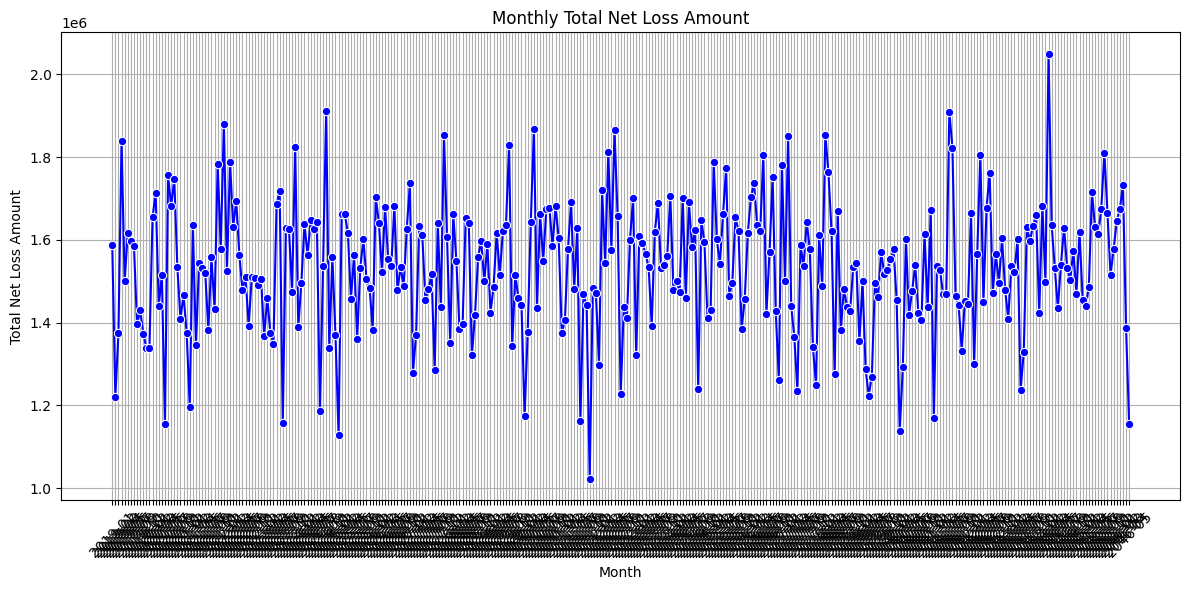

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\3383177823.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_loss, x='Quarter', y='Event Net Loss Amount', palette='viridis')


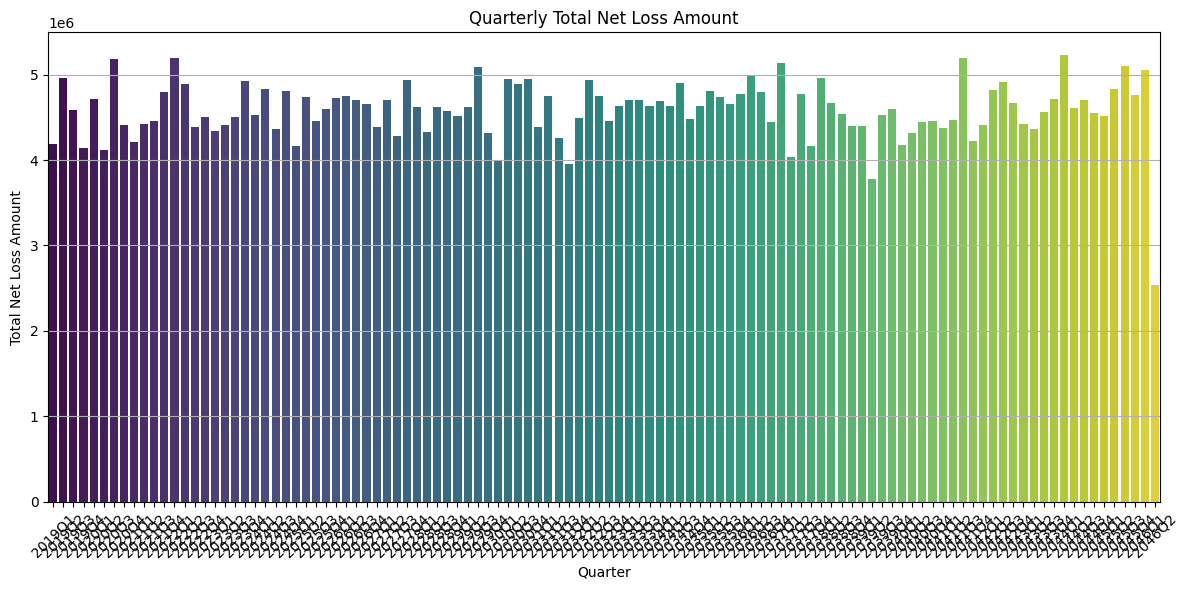

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\3383177823.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_loss, x='Year', y='Event Net Loss Amount', palette='plasma')


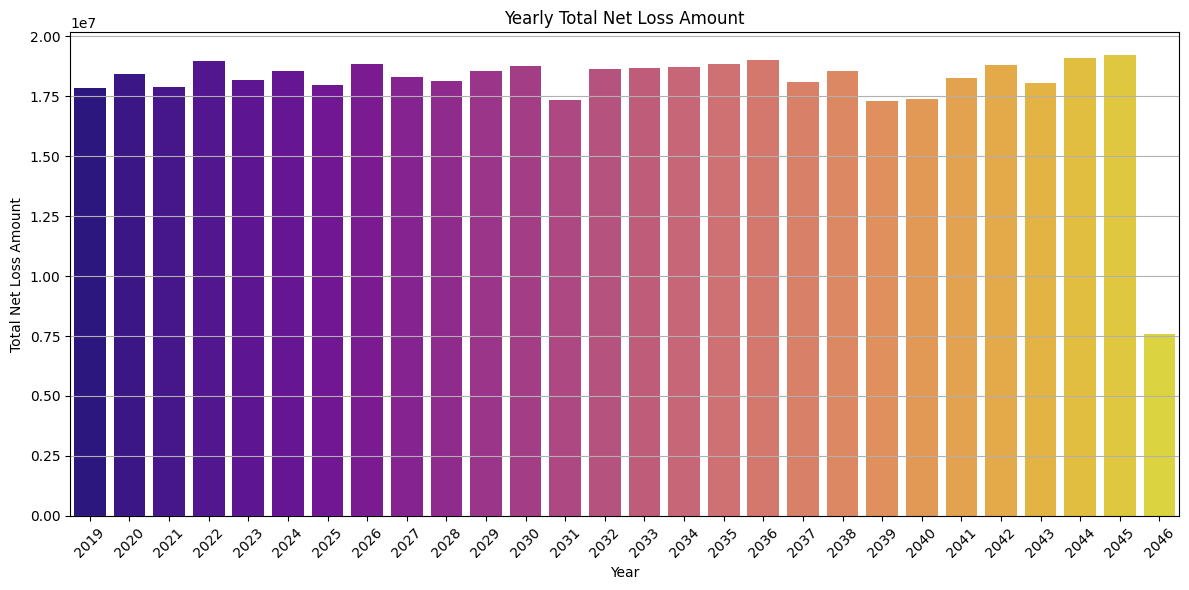

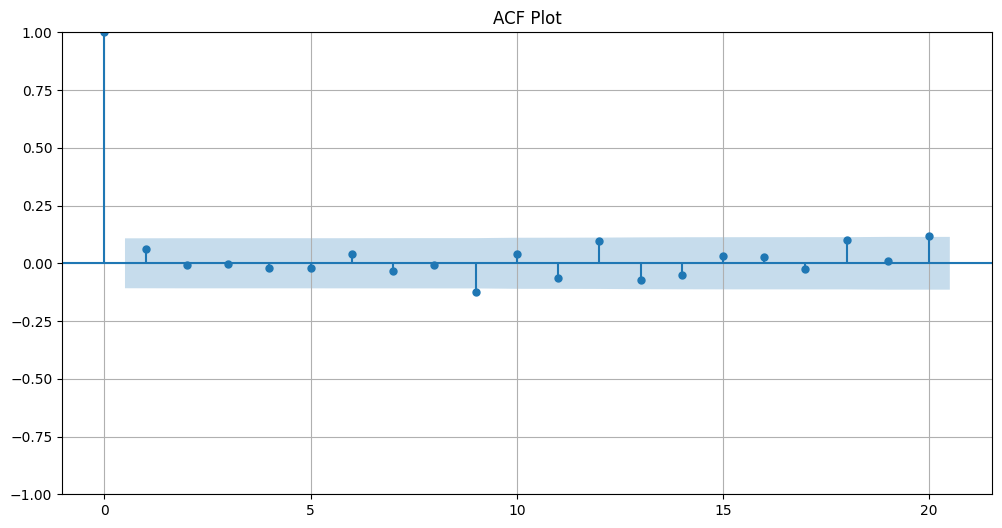

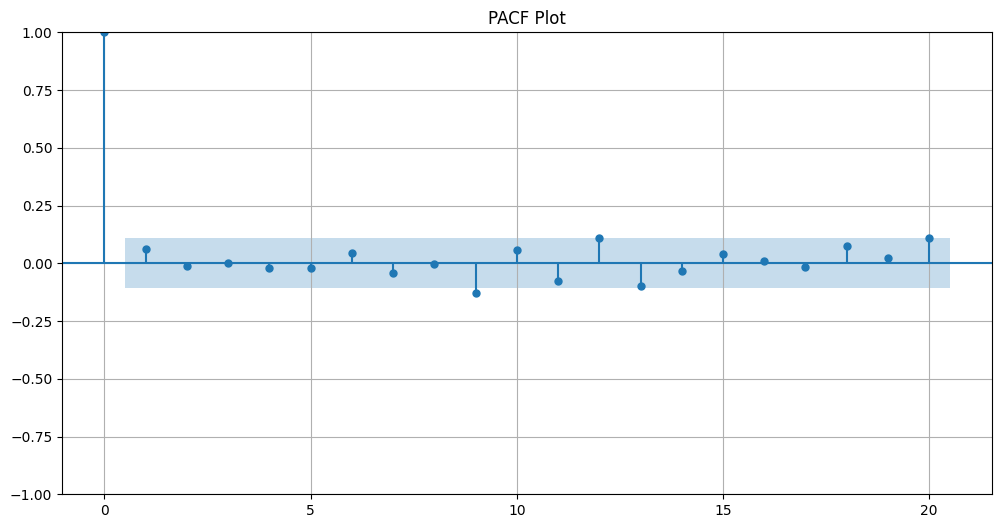

C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\3383177823.py:138: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hw_forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


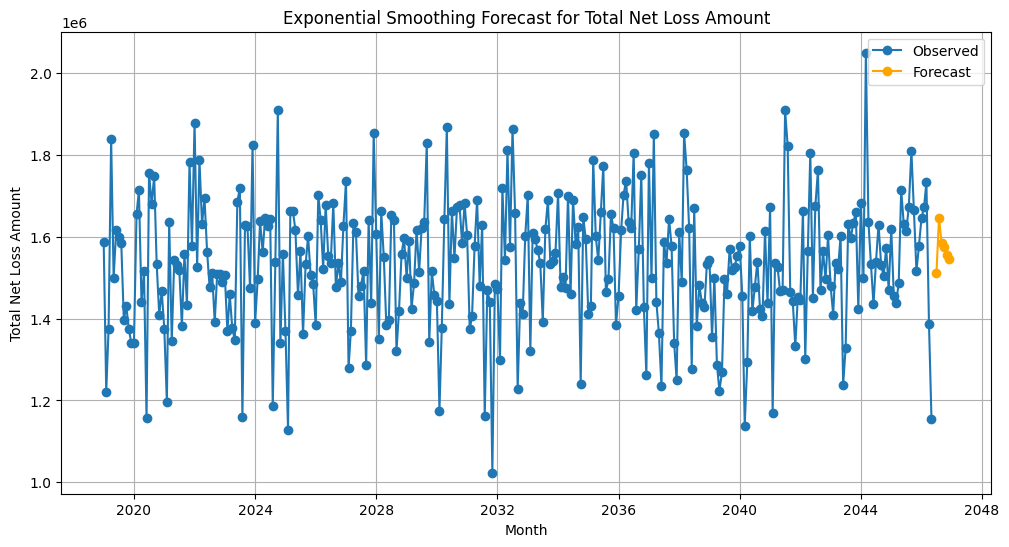

C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_20312\3383177823.py:157: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  arima_forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1)

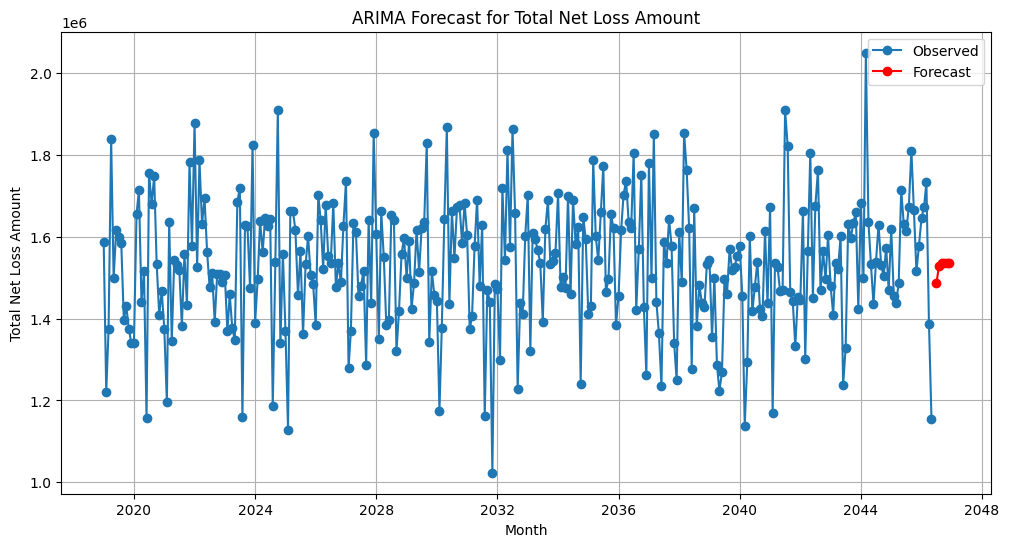

Holt-Winters RMSE: 190687.28
ARIMA RMSE: 202930.41


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Constants
NUM_RECORDS = 10000
START_DATE = '2019-01-01'  # Start date for 4 years of data

# Updated business lines and event types
BUSINESS_LINES = [
    'Retail', 'Insurance', 'Telecom', 'Finance', 'Healthcare',
    'Manufacturing', 'Energy', 'Transportation', 'Hospitality',
    'Agriculture', 'Technology', 'Real Estate'
]

EVENT_TYPES = [
    'Fraud', 'System Failure', 'Regulatory', 'Data Breach',
    'Natural Disaster', 'Operational Error', 'Market Risk', 
    'Cyber Attack', 'Supply Chain Disruption', 'Theft', 
    'Compliance Violation', 'Equipment Failure'
]

def generate_dummy_data(num_records, start_date):
    """Generate a dummy dataset for operational loss events."""
    dates = pd.date_range(start=start_date, periods=num_records, freq='D')
    data = {
        'Date': dates,
        'Business Line': [random.choice(BUSINESS_LINES) for _ in range(num_records)],
        'Event Type': [random.choice(EVENT_TYPES) for _ in range(num_records)],
        'Event Description': [
            f"{random.choice(EVENT_TYPES)} occurred in {random.choice(BUSINESS_LINES)} sector."
            for _ in range(num_records)
        ],
        'Event Net Loss Amount': [round(random.uniform(1000, 100000), 2) for _ in range(num_records)]
    }
    return pd.DataFrame(data)

# Generate dummy data
df = generate_dummy_data(NUM_RECORDS, START_DATE)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# EDA: Overview of the dataset
print(df.info())
print(df.describe())

# Save the DataFrame to a CSV file
df.to_csv('operational_loss_data.csv', index=False)

# EDA: Monthly, Quarterly, and Yearly Analysis
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Monthly total net loss amount
monthly_loss = df.groupby('Month')['Event Net Loss Amount'].sum().reset_index()
monthly_loss['Month'] = monthly_loss['Month'].astype(str)

# Quarterly total net loss amount
quarterly_loss = df.groupby('Quarter')['Event Net Loss Amount'].sum().reset_index()
quarterly_loss['Quarter'] = quarterly_loss['Quarter'].astype(str)

# Yearly total net loss amount
yearly_loss = df.groupby('Year')['Event Net Loss Amount'].sum().reset_index()

# Plot Monthly Loss Distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_loss, x='Month', y='Event Net Loss Amount', marker='o', color='blue')
plt.title('Monthly Total Net Loss Amount')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Net Loss Amount')
plt.grid()
plt.tight_layout()
plt.show()

# Plot Quarterly Loss Distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_loss, x='Quarter', y='Event Net Loss Amount', palette='viridis')
plt.title('Quarterly Total Net Loss Amount')
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Total Net Loss Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Yearly Loss Distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_loss, x='Year', y='Event Net Loss Amount', palette='plasma')
plt.title('Yearly Total Net Loss Amount')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Net Loss Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Time Series Modeling

# Prepare data for time series
ts_data = monthly_loss.copy()
ts_data['Month'] = pd.to_datetime(ts_data['Month'].astype(str))  # Convert Month to datetime
ts_data.set_index('Month', inplace=True)

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(ts_data['Event Net Loss Amount'], lags=20, ax=plt.gca())
plt.title('ACF Plot')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(ts_data['Event Net Loss Amount'], lags=20, ax=plt.gca())
plt.title('PACF Plot')
plt.grid()
plt.show()

# Fit Exponential Smoothing model
model_hw = ExponentialSmoothing(ts_data['Event Net Loss Amount'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = model_hw.fit()

# Forecasting
hw_forecast = hw_fit.forecast(6)  # Forecast for next 6 months
hw_forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')

# Plot Exponential Smoothing results
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['Event Net Loss Amount'], label='Observed', marker='o')
plt.plot(hw_forecast_index, hw_forecast, label='Forecast', marker='o', color='orange')
plt.title('Exponential Smoothing Forecast for Total Net Loss Amount')
plt.xlabel('Month')
plt.ylabel('Total Net Loss Amount')
plt.legend()
plt.grid()
plt.show()

# Fit ARIMA model
model_arima = ARIMA(ts_data['Event Net Loss Amount'], order=(1, 1, 1))  # Replace (1, 1, 1) with optimal p, d, q values from ACF/PACF
arima_fit = model_arima.fit()

# Forecasting
arima_forecast = arima_fit.forecast(6)
arima_forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['Event Net Loss Amount'], label='Observed', marker='o')
plt.plot(arima_forecast_index, arima_forecast, label='Forecast', marker='o', color='red')
plt.title('ARIMA Forecast for Total Net Loss Amount')
plt.xlabel('Month')
plt.ylabel('Total Net Loss Amount')
plt.legend()
plt.grid()
plt.show()

# Evaluation of Forecast Models
# Calculate RMSE for both models
hw_rmse = np.sqrt(mean_squared_error(ts_data['Event Net Loss Amount'][-6:], hw_forecast))
arima_rmse = np.sqrt(mean_squared_error(ts_data['Event Net Loss Amount'][-6:], arima_forecast))

print(f'Holt-Winters RMSE: {hw_rmse:.2f}')
print(f'ARIMA RMSE: {arima_rmse:.2f}')
